# **Load files**

In [439]:
!pip install pyecharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [440]:
import pandas as pd 
import numpy as np
import os, pathlib
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts.charts import Map
from pyecharts import options as opts
%matplotlib inline

from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.NTERACT
from pyecharts import options as opts
from pyecharts.charts import Bar
from pandas import Series
from collections import Counter
from pyecharts.globals import CurrentConfig, NotebookType
import matplotlib.colors as mcolors

In [441]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)
folder_path = drivePath + '/MyDrive/Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [442]:
assignmentPath = folder_path
assignmentPath2 = folder_path + '/Each_Company_Problem'

# **Check data**

## Read the csv

In [443]:
df_company = pd.read_csv(assignmentPath + "companies_df.csv")
df_company.head()

Unnamed: 0    Company  Problem Number
0           0     Amazon            1245
1           1     Google            1212
2           2  Microsoft             761
3           3   Facebook             691
4           4      Apple             641

In [444]:
df_globalrank = pd.read_csv( assignmentPath + "global_ranking_df.csv" )
df_globalrank.head()

Unnamed: 0  Rank User Name  Contests Attended        Country
0           0     1   neal_wu                 51  United States
1           1     2   numb3r5                 81      Australia
2           2     3   nyu_ldf                 86            NaN
3           3     4  int65536                 35          China
4           4     5  JOHNKRAM                220          China

In [445]:
df_proinfo = pd.read_csv( assignmentPath + "problems_info.csv" )
df_proinfo.head()

Unnamed: 0                                              Title  \
0           0                  208. Implement Trie (Prefix Tree)   
1           1                                         1. Two Sum   
2           2                                 2. Add Two Numbers   
3           3  3. Longest Substring Without Repeating Characters   
4           4                     4. Median of Two Sorted Arrays   

                                        Topic Label Accetpance Difficulty  \
0          ['Hash Table', 'String', 'Design', '1+']     62.50%     Medium   
1                           ['Array', 'Hash Table']     49.60%       Easy   
2              ['Linked List', 'Math', 'Recursion']     40.30%     Medium   
3        ['Hash Table', 'String', 'Sliding Window']     33.80%     Medium   
4  ['Array', 'Binary Search', 'Divide and Conquer']     36.10%       Hard   

   Frequency Accepted Submissions Premium  
0  26.1195%;   786.6K        1.3M       Y  
1  99.4833%;     9.2M       18.5M     NaN  
2  94.8402%;     3.5M        8.7M     NaN  
3  95.2438%;     4.3M       12.8M     NaN  
4  92.7477%;     1.8M        5.1M     NaN

In [446]:
df_rankuser = pd.read_csv( assignmentPath + "ranking_user_Info_df.csv" )
df_rankuser.head()

Unnamed: 0     User Name  \
0           0      int65536   
1           1      JOHNKRAM   
2           2  endlesscheng   
3           3      arignote   
4           4      moransky   

                                           Languages Advanced skill  \
0                                            ['C++']            NaN   
1                   ['C++', 'JavaScript', 'Python3']            NaN   
2  ['Go', 'Python3', 'C++', 'Java', 'MySQL', 'Jav...            NaN   
3                ['Java', 'C++', 'Python3', 'MySQL']            NaN   
4                                 ['C++', 'Python3']            NaN   

  Intermediate skill Fundamental skill  \
0                NaN               NaN   
1                NaN               NaN   
2                NaN               NaN   
3                NaN               NaN   
4                NaN               NaN   

                                                  技能  
0  ['数组', '回溯', '二分查找', '位运算', '状态压缩', '计数', '动态规...  
1  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
2  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
3  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
4  ['数组', '回溯', '二分查找', '二叉树', '位运算', '广度优先搜索', '...

# **Data preprocessing**

## Q1:题目总数大于20个以上的公司，这些公司偏爱什么问题

In [447]:
df_company20 = df_company[df_company['Problem Number'] > 20]
df_company20

Unnamed: 0        Company  Problem Number
0            0         Amazon            1245
1            1         Google            1212
2            2      Microsoft             761
3            3       Facebook             691
4            4          Apple             641
..         ...            ...             ...
77         896  Akuna Capital              23
78         897            HRT              23
79         898        PhonePe              22
80        1172         Swiggy              21
81        1173          Karat              21

[82 rows x 3 columns]

In [448]:
len(df_company20['Company'].unique())
 #how many company

82

In [449]:
company20_name = df_company20['Company'].unique().tolist()
print(company20_name)

['Amazon', 'Google', 'Microsoft', 'Facebook', 'Apple', 'Bloomberg', 'Adobe', 'Uber', 'Oracle', 'Goldman Sachs', 'TikTok', 'Yahoo', 'LinkedIn', 'ByteDance', 'Salesforce', 'Walmart Global Tech', 'Snapchat', 'VMware', 'Twitter', 'eBay', 'Expedia', 'Paypal', 'DoorDash', 'Cisco', 'Visa', 'Samsung', 'JPMorgan', 'Airbnb', 'Yandex', 'Intuit', 'Qualtrics', 'Nvidia', 'Infosys', 'Flipkart', 'tcs', 'DE Shaw', 'Citadel', 'ServiceNow', 'Tesla', 'Morgan Stanley', 'Zillow', 'Wix', 'Wayfair', 'Square', 'IBM', 'Intel', 'Atlassian', 'Qualcomm', 'Indeed', 'Spotify', 'Arcesium', 'Lyft', 'Pinterest', 'Splunk', 'Twilio', 'Mathworks', 'Nutanix', 'SAP', 'PayTM', 'Shopee', 'Wish', 'Yelp', 'Twitch', 'American Express', 'Rubrik', 'Palantir Technologies', 'Zoho', 'Dropbox', 'Quora', 'Grab', 'Roblox', 'Capital One', 'Docusign', 'Zenefits', 'Cruise Automation', 'Sprinklr', 'Media.net', 'Akuna Capital', 'HRT', 'PhonePe', 'Swiggy', 'Karat']


In [450]:
df = []
for index, cname in enumerate(company20_name):
  csvlist =(assignmentPath2 + "/{}.csv").format(company20_name[index])
  cnameData = pd.read_csv(csvlist)
  cnameData.insert(cnameData.shape[1], 'company_name', company20_name[index])
  df.append(cnameData)

company20_problem = pd.concat(df,ignore_index=True)
company20_problem.drop(['Unnamed: 0'], axis = 1)

Problem company_name
0                                               Two Sum       Amazon
1                                       Add Two Numbers       Amazon
2        Longest Substring Without Repeating Characters       Amazon
3                           Median of Two Sorted Arrays       Amazon
4                         Longest Palindromic Substring       Amazon
...                                                 ...          ...
1474                Maximum Length of Repeated Subarray        Karat
1475                              Subdomain Visit Count        Karat
1476        Find Words That Can Be Formed by Characters        Karat
1477  Alert Using Same Key-Card Three or More Times ...        Karat
1478  Check if Every Row and Column Contains All Num...        Karat

[1479 rows x 2 columns]

In [451]:
len(company20_problem['company_name'].unique()) #这里我要解释一下为什么和一开始读取的公司数量不一样，因为有一些公司它的csv不存在数据

72

In [452]:
# 统计每个问题的重复值
company20_problem['Problem'].value_counts()

Two Sum                                               19
Merge Intervals                                       18
Number of Islands                                     15
LRU Cache                                             15
Word Search                                           13
                                                      ..
Minimum Interval to Include Each Query                 1
Determine if Two Strings Are Close                     1
Maximum Number of Visible Points                       1
Rearrange Spaces Between Words                         1
Check if Every Row and Column Contains All Numbers     1
Name: Problem, Length: 622, dtype: int64

In [453]:
company20_problem_copy = company20_problem.copy()
company20_problem_copy

Unnamed: 0                                            Problem  \
0             0                                            Two Sum   
1             1                                    Add Two Numbers   
2             2     Longest Substring Without Repeating Characters   
3             3                        Median of Two Sorted Arrays   
4             4                      Longest Palindromic Substring   
...         ...                                                ...   
1474          4                Maximum Length of Repeated Subarray   
1475          5                              Subdomain Visit Count   
1476          6        Find Words That Can Be Formed by Characters   
1477          7  Alert Using Same Key-Card Three or More Times ...   
1478          8  Check if Every Row and Column Contains All Num...   

     company_name  
0          Amazon  
1          Amazon  
2          Amazon  
3          Amazon  
4          Amazon  
...           ...  
1474        Karat  
1475        Karat  
1476        Karat  
1477        Karat  
1478        Karat  

[1479 rows x 3 columns]

In [454]:
pro_groupby = company20_problem_copy.groupby('Problem').count().reset_index() #数每个问题出现的次数
pro_groupby.rename(columns={'Unnamed: 0': 'problem_sum'},inplace = True)
pro_groupby

Problem  problem_sum  company_name
0         01 Matrix            1             1
1              3Sum           10            10
2      3Sum Closest            3             3
3              4Sum            3             3
4    Accounts Merge            2             2
..              ...          ...           ...
617   Word Break II            4             4
618     Word Ladder            5             5
619  Word Ladder II            2             2
620     Word Search           13            13
621  Word Search II           10            10

[622 rows x 3 columns]

In [455]:
middle = pro_groupby['problem_sum'].mean() / pro_groupby['problem_sum'].sum() #问题出现次数的平均数除以问题总数
max = pro_groupby['problem_sum'].max() / pro_groupby['problem_sum'].sum()#问题出现次数的最大值除以问题总数
middle, max #问题出现次数平均值占总比0.16%，问题出现次数最大值占总比1.2%，数值都不大，可以取值：问题次数占比在0.4%以上的

(0.001607717041800643, 0.012846517917511832)

In [456]:
mid = pro_groupby['problem_sum'].sum()*0.004
mid_list = pro_groupby[pro_groupby['problem_sum'] > mid]
mid_list.insert(mid_list.shape[1], 'Percentage%', (pro_groupby['problem_sum']/pro_groupby['problem_sum'].sum())*100)
mid_list.drop(columns=['company_name'],inplace=True)
mid_list = mid_list.sort_values(by=['problem_sum'], ascending=True)

Text(0.5, 1.0, 'What questions the company prefers (companies with more than 20 question pools)')

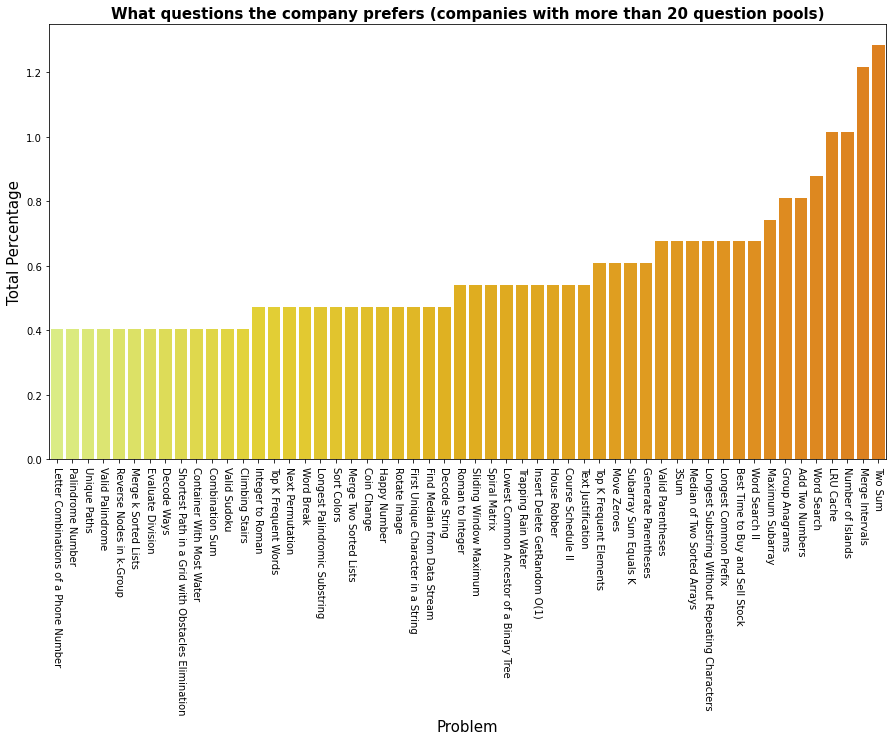

In [457]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax = sns.barplot(x="Problem", y="Percentage%", data=mid_list ,palette="Wistia")
plt.xlabel("Problem",fontsize=15)
plt.xticks(fontsize=10,rotation=-90)  
plt.ylabel("Total Percentage",fontsize=15)
ax.set_title("What questions the company prefers (companies with more than 20 question pools)", fontsize=15, weight='bold')

## Q2:题库中的题目每个题型类别占比

In [458]:
len(df_proinfo['Title'])

2591

In [459]:
df_proinfo['Title']

0                       208. Implement Trie (Prefix Tree)
1                                              1. Two Sum
2                                      2. Add Two Numbers
3       3. Longest Substring Without Repeating Characters
4                          4. Median of Two Sorted Arrays
                              ...                        
2586     2586. Count the Number of Vowel Strings in Range
2587       2587. Rearrange Array to Maximize Prefix Score
2588        2588. Count the Number of Beautiful Subarrays
2589             2589. Minimum Time to Complete All Tasks
2590                             2590. Design a Todo List
Name: Title, Length: 2591, dtype: object

In [460]:
#原来的csv题目名字前面有序号，与mid_list是匹配不上的，所以要用正则先把每一个题目前面的序号去除掉
import re
for i in range(len(df_proinfo['Title'])):
  df_proinfo['Title'][i]=re.sub(r'\d{1,6}\. ', '', df_proinfo['Title'][i])
df_proinfo['Title']
df_proinfo.drop(columns = ['Accepted', 'Submissions', 'Premium'], inplace = True)

df_proinfo.head()

Unnamed: 0                                           Title  \
0           0                    Implement Trie (Prefix Tree)   
1           1                                         Two Sum   
2           2                                 Add Two Numbers   
3           3  Longest Substring Without Repeating Characters   
4           4                     Median of Two Sorted Arrays   

                                        Topic Label Accetpance Difficulty  \
0          ['Hash Table', 'String', 'Design', '1+']     62.50%     Medium   
1                           ['Array', 'Hash Table']     49.60%       Easy   
2              ['Linked List', 'Math', 'Recursion']     40.30%     Medium   
3        ['Hash Table', 'String', 'Sliding Window']     33.80%     Medium   
4  ['Array', 'Binary Search', 'Divide and Conquer']     36.10%       Hard   

   Frequency  
0  26.1195%;  
1  99.4833%;  
2  94.8402%;  
3  95.2438%;  
4  92.7477%;

In [461]:
#这个题库是第一题里面的mid_list,problem_info的csv合并
problem_infomation = mid_list.merge(df_proinfo,left_on='Problem',right_on='Title')
problem_infomation.drop(columns=['Unnamed: 0','Title'], inplace=True)
problem_infomation.head()

Problem  problem_sum  Percentage%  \
0  Letter Combinations of a Phone Number            6      0.40568   
1                      Palindrome Number            6      0.40568   
2                           Unique Paths            6      0.40568   
3                       Valid Palindrome            6      0.40568   
4               Reverse Nodes in k-Group            6      0.40568   

                                        Topic Label Accetpance Difficulty  \
0          ['Hash Table', 'String', 'Backtracking']     56.40%     Medium   
1                                          ['Math']     53.50%       Easy   
2  ['Math', 'Dynamic Programming', 'Combinatorics']     62.60%     Medium   
3                        ['Two Pointers', 'String']     44.30%       Easy   
4                      ['Linked List', 'Recursion']     54.50%       Hard   

   Frequency  
0  85.3666%;  
1  93.3893%;  
2  66.3292%;  
3  71.8193%;  
4   73.991%;

In [462]:
problem_infomation_copy = problem_infomation.copy()

In [463]:
result = []
result2=[]
for i in range(len(problem_infomation_copy['Topic Label'])):
  result.append(problem_infomation_copy['Topic Label'][i][1:-1])
  result2 = ''.join(str(j) for j in result)
  
print(result2)

'Hash Table', 'String', 'Backtracking''Math''Math', 'Dynamic Programming', 'Combinatorics''Two Pointers', 'String''Linked List', 'Recursion''Linked List', 'Divide and Conquer', '2+''Array', 'Depth-First Search', '4+''String', 'Dynamic Programming''Array', 'Breadth-First Search', 'Matrix''Array', 'Two Pointers', 'Greedy''Array', 'Backtracking''Array', 'Hash Table', 'Matrix''Math', 'Dynamic Programming', 'Memoization''Hash Table', 'Math', 'String''Hash Table', 'String', 'Trie', '4+''Array', 'Two Pointers''Array', 'Hash Table', 'String', '3+''String', 'Dynamic Programming''Array', 'Two Pointers', 'Sorting''Linked List', 'Recursion''Array', 'Dynamic Programming', '1+''Hash Table', 'Math', 'Two Pointers''Array', 'Math', 'Matrix''Hash Table', 'String', 'Queue', '1+''Two Pointers', 'Design', 'Sorting', '2+''String', 'Stack', 'Recursion''Hash Table', 'Math', 'String''Array', 'Queue', 'Sliding Window', '2+''Array', 'Matrix', 'Simulation''Tree', 'Depth-First Search', 'Binary Tree''Array', 'Two P

In [464]:
pattern = r"'(.*?)'"
result3 = re.findall(pattern, result2)
num = Counter(result3) #计算每个标签出现的次数
result3_values = list(num.values()) #将次数列出存到list

In [465]:
df_result3 = pd.DataFrame(result3)
df_result3_values = pd.DataFrame(result3_values)
df_result3_all = pd.concat([df_result3, df_result3_values], axis=1)
df_result3_all.columns=['Title_Type','Title_sum']
df_result3_all = df_result3_all.dropna()
df_result3_all.head()

Title_Type  Title_sum
0    Hash Table       15.0
1        String       17.0
2  Backtracking        5.0
3          Math        9.0
4          Math        8.0

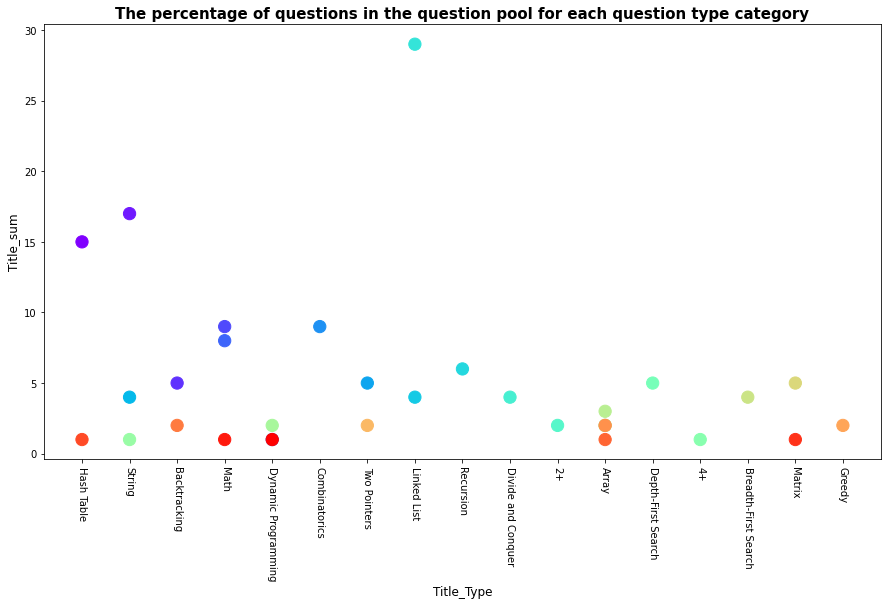

In [466]:
# Create a color map with a unique color for each data point
num_points = len(df_result3_all)
colors = plt.cm.rainbow(np.linspace(0, 1, num_points))

df_result3_all.plot(kind = 'scatter', x = 'Title_Type', y = 'Title_sum',figsize=(15,8), s = 150, c = colors)
plt.xticks(fontsize=10,rotation=-90)  
plt.xlabel('Title_Type',fontsize=12)
plt.ylabel("Title_sum",fontsize=12)
plt.title('The percentage of questions in the question pool for each question type category', fontsize=15, weight='bold')

plt.show()

## Q3:题库中题目的难度占比

In [467]:
# 查询三个等级的数量分布
count = df_proinfo['Difficulty'].value_counts()
# 查询总行数
all_number = df_proinfo.shape[0]
# 数据处理

easy_level = 100*(count['Easy']/all_number).round(2)
medium_level = 100*(count['Medium']/all_number).round(2)
hard_level = 100*(count['Hard']/all_number).round(2)
series = Series([easy_level,medium_level,hard_level],index=['Easy','Medium','Hard'])
series_df=series.to_frame()
series_df.reset_index(level=0, inplace=True)
series_df.columns = ['level','sum']

In [468]:
# 尝试交互可视化
series_list1 = series_df['level'].tolist()
series_list2 = series_df['sum'].tolist()

bar_ = Bar(
  init_opts=opts.InitOpts(width="1000px", 
                          height="900px", 
                          theme="white"))


bar = (
    Bar()
    .add_xaxis(series_list1)
    .add_yaxis("", series_list2, color = '#F67B49')
    .set_global_opts(title_opts=opts.TitleOpts(title="Distribution Distribution of Questions (%)", 
                                               pos_right="center", 
                                               pos_top="5%",
                                               subtitle=""))
)

bar.load_javascript()
bar.render_notebook()

## Q4:全世界用户分布

In [469]:
## 数据预处理
df_globalrank['User Name'].unique()
df_globalrank.dropna(axis=0, inplace=True)
# 将国家中文名替换为英文名，方便统计
df_globalrank.replace('日本', 'Japan',inplace = True)
df_globalrank.replace('美国', 'United States',inplace = True)
df_globalrank.replace('百慕大', 'Bermuda',inplace = True)
df_globalrank.replace('阿鲁巴', 'Aruba',inplace = True)
df_globalrank.replace('比利时', 'Belgium',inplace = True)
df_globalrank.replace('朝鲜', 'North Korea',inplace = True)
df_globalrank.replace('俄罗斯', 'Russia',inplace = True)
df_globalrank.replace('开曼群岛', 'Cayman Islands',inplace = True)
df_globalrank.replace('圣诞岛', 'Christmas Island',inplace = True)
df_globalrank.replace('新加坡', 'Singapore',inplace = True)
df_globalrank.replace('南极洲', 'Antarctica',inplace = True)
df_globalrank.replace('新西兰', 'New Zealand',inplace = True)
df_globalrank.replace('摩纳哥', 'Monaco',inplace = True)
df_globalrank.replace('海外', 'China',inplace = True)
# 建立dataframe
count_country = df_globalrank['Country'].value_counts()
country_df=count_country.to_frame()
country_df.reset_index(level=0, inplace=True)
country_df.columns = ['Country','number']

In [470]:
country_df.head(5)

Country  number
0          China     774
1  United States     201
2          India     132
3         Taiwan      61
4          Japan      52

In [471]:
## 生成热力地图
# notebook显示图例
CurrentConfig.NOTEBOOK_TYPE = NotebookType.NTERACT

data = country_df.apply(lambda x:tuple(x),axis=1).values.tolist()
gmv = country_df['number'].values

_max =int(np.max(gmv))
_min =int(np.min(gmv))

# 设置地图的基本参数
map_ = Map(
  init_opts=opts.InitOpts(width="1500px", 
                          height="900px", 
                          
                          theme="white"))

# 导入数据，设置每个国家的首都坐标点不可见，设置国家名字不可见
map_.add(
    "",
    data, 
    is_map_symbol_show=False, 
    maptype="world", 
    label_opts=opts.LabelOpts(is_show=False), 
    # center = [116.46, 39.92],
    layout_center = ['50%', '50%'],

    # layoutCenter = None,
    zoom=1)


# 设置地图的全局参数
map_.set_global_opts(
    title_opts=opts.TitleOpts(title="Country Distribution of Members on Ranking Board",
                              pos_right="center", 
                              pos_top="5%",
                              ),
                              
    visualmap_opts=opts.VisualMapOpts(max_=_max ,
                                      min_=_min ,
                                      range_text=[_max ,_min ],
                                      range_color=['#FFF3AC','#FDA45D','#F67B49','#DB382B','#A80526'] # 由浅到深排列
                                     ),
    )


In [472]:
# 生成在线热力地图
map_.load_javascript()
map_.render_notebook()

## Q5:全世界排名靠前用户都比较喜欢掌握什么技能和语言

In [473]:
df_rankuser_copy = pd.read_csv( assignmentPath + "ranking_user_Info_df.csv" )
df_globalrank_copy = pd.read_csv( assignmentPath + "global_ranking_df.csv" )

In [474]:
df_user_rank_skill_language = pd.merge(df_globalrank_copy, df_rankuser_copy, on = 'User Name')
df_user_rank_skill_language.head(5)

Unnamed: 0_x  Rank     User Name  Contests Attended    Country  \
0             1     2       numb3r5                 81  Australia   
1             3     4      int65536                 35      China   
2             4     5      JOHNKRAM                220      China   
3             5     6  endlesscheng                158      China   
4             6     7           uwi                331      Japan   

   Unnamed: 0_y                                          Languages  \
0           794  ['Python3', 'C++', 'MySQL', 'Ruby', 'JavaScrip...   
1             0                                            ['C++']   
2             1                   ['C++', 'JavaScript', 'Python3']   
3             2  ['Go', 'Python3', 'C++', 'Java', 'MySQL', 'Jav...   
4           796                                    ['Java', 'C++']   

                                      Advanced skill  \
0  ['Dynamic Programming', 'x227', 'Union Find', ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  ['Dynamic Programming', 'x261', 'Backtracking'...   

                                  Intermediate skill  \
0  ['Hash Table', 'x259', 'Math', 'x207', 'Binary...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  ['Hash Table', 'x294', 'Math', 'x260', 'Greedy...   

                                   Fundamental skill  \
0  ['Array', 'x755', 'String', 'x310', 'Sorting',...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  ['Array', 'x878', 'String', 'x396', 'Sorting',...   

                                                  技能  
0                                                NaN  
1  ['数组', '回溯', '二分查找', '位运算', '状态压缩', '计数', '动态规...  
2  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
3  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
4                                                NaN

In [475]:
df_user_rank_skill_language.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'], inplace = True)
for index in range(len(df_user_rank_skill_language)):
    df_user_rank_skill_language.loc[index, 'Rank'] = index + 1
df_user_rank_skill_language.head(5)

Rank     User Name  Contests Attended    Country  \
0     1       numb3r5                 81  Australia   
1     2      int65536                 35      China   
2     3      JOHNKRAM                220      China   
3     4  endlesscheng                158      China   
4     5           uwi                331      Japan   

                                           Languages  \
0  ['Python3', 'C++', 'MySQL', 'Ruby', 'JavaScrip...   
1                                            ['C++']   
2                   ['C++', 'JavaScript', 'Python3']   
3  ['Go', 'Python3', 'C++', 'Java', 'MySQL', 'Jav...   
4                                    ['Java', 'C++']   

                                      Advanced skill  \
0  ['Dynamic Programming', 'x227', 'Union Find', ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  ['Dynamic Programming', 'x261', 'Backtracking'...   

                                  Intermediate skill  \
0  ['Hash Table', 'x259', 'Math', 'x207', 'Binary...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  ['Hash Table', 'x294', 'Math', 'x260', 'Greedy...   

                                   Fundamental skill  \
0  ['Array', 'x755', 'String', 'x310', 'Sorting',...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  ['Array', 'x878', 'String', 'x396', 'Sorting',...   

                                                  技能  
0                                                NaN  
1  ['数组', '回溯', '二分查找', '位运算', '状态压缩', '计数', '动态规...  
2  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
3  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
4                                                NaN

In [476]:
# split China users
China_Users = df_user_rank_skill_language[pd.isna(df_user_rank_skill_language['Advanced skill']) & pd.isna(df_user_rank_skill_language['Intermediate skill']) & pd.isna(df_user_rank_skill_language['Fundamental skill'])].drop(columns = ['Advanced skill', 'Intermediate skill', 'Fundamental skill'])
China_Users.reset_index(inplace = True)
China_Users.drop(columns = ['index', 'Rank'], inplace = True)
China_Users.head(5)

User Name  Contests Attended Country  \
0      int65536                 35   China   
1      JOHNKRAM                220   China   
2  endlesscheng                158   China   
3      arignote                192   China   
4      moransky                 65   China   

                                           Languages  \
0                                            ['C++']   
1                   ['C++', 'JavaScript', 'Python3']   
2  ['Go', 'Python3', 'C++', 'Java', 'MySQL', 'Jav...   
3                ['Java', 'C++', 'Python3', 'MySQL']   
4                                 ['C++', 'Python3']   

                                                  技能  
0  ['数组', '回溯', '二分查找', '位运算', '状态压缩', '计数', '动态规...  
1  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
2  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
3  ['栈', '贪心', '位运算', '树', '深度优先搜索', '广度优先搜索', '并...  
4  ['数组', '回溯', '二分查找', '二叉树', '位运算', '广度优先搜索', '...

In [477]:
China_Users['Languages'] = China_Users['Languages'].str.replace('[','').str.replace(']','').str.replace(', ',',')
for index in range(len(China_Users)):
    if ',' not in China_Users.loc[index, 'Languages']:
        China_Users.loc[index, China_Users.loc[index, 'Languages'].replace('\'', '')] = 1
    else:
        for label in China_Users.loc[index, 'Languages'].split(','):
            China_Users.loc[index, label.replace('\'', '')] = 1
China_Users.drop('', axis = 1, inplace = True)

In [478]:
China_Users_Language = China_Users.columns.tolist()[5:]
China_column_sum = China_Users[China_Users_Language].sum().sort_values(ascending = False)
China_sum_df = pd.DataFrame(China_column_sum)
China_sum_df = China_sum_df.rename(columns = {0:'Sum'}).reset_index()
China_sum_df.head(3)

index    Sum
0      C++  708.0
1  Python3  512.0
2     Java  401.0

In [479]:
# split Forigner users
Forigner_Users = df_user_rank_skill_language[pd.isna(df_user_rank_skill_language['技能'])].drop(columns = '技能')
Forigner_Users.reset_index(inplace = True)
Forigner_Users.drop(columns = ['index', 'Rank'], inplace = True)
Forigner_Users.head(5)

User Name  Contests Attended        Country  \
0    numb3r5                 81      Australia   
1        uwi                331          Japan   
2  wwwwodddd                 24  United States   
3  wwwwodddd                 26          China   
4   xiaowuc1                 51  United States   

                                           Languages  \
0  ['Python3', 'C++', 'MySQL', 'Ruby', 'JavaScrip...   
1                                    ['Java', 'C++']   
2  ['Python3', 'C++', 'MySQL', 'Python', 'Ruby', ...   
3  ['Python3', 'C++', 'MySQL', 'Python', 'Ruby', ...   
4       ['C++', 'Java', 'Python3', 'Python', 'Bash']   

                                      Advanced skill  \
0  ['Dynamic Programming', 'x227', 'Union Find', ...   
1  ['Dynamic Programming', 'x261', 'Backtracking'...   
2  ['Dynamic Programming', 'x267', 'Backtracking'...   
3  ['Dynamic Programming', 'x267', 'Backtracking'...   
4  ['Dynamic Programming', 'x76', 'Union Find', '...   

                                  Intermediate skill  \
0  ['Hash Table', 'x259', 'Math', 'x207', 'Binary...   
1  ['Hash Table', 'x294', 'Math', 'x260', 'Greedy...   
2  ['Math', 'x304', 'Hash Table', 'x298', 'Greedy...   
3  ['Math', 'x304', 'Hash Table', 'x298', 'Greedy...   
4  ['Math', 'x78', 'Hash Table', 'x69', 'Greedy',...   

                                   Fundamental skill  
0  ['Array', 'x755', 'String', 'x310', 'Sorting',...  
1  ['Array', 'x878', 'String', 'x396', 'Sorting',...  
2  ['Array', 'x854', 'String', 'x391', 'Sorting',...  
3  ['Array', 'x854', 'String', 'x391', 'Sorting',...  
4  ['Array', 'x205', 'String', 'x112', 'Sorting',...

In [480]:
Forigner_Users['Languages'] = Forigner_Users['Languages'].str.replace('[','').str.replace(']','').str.replace(', ',',')
for index in range(len(Forigner_Users)):
    if ',' not in Forigner_Users.loc[index, 'Languages']:
        Forigner_Users.loc[index, Forigner_Users.loc[index, 'Languages'].replace('\'', '')] = 1
    else:
        for label in Forigner_Users.loc[index, 'Languages'].split(','):
            Forigner_Users.loc[index, label.replace('\'', '')] = 1
Forigner_Users.drop('', axis = 1, inplace = True)
Forigner_Users.head(3)

User Name  Contests Attended        Country  \
0    numb3r5                 81      Australia   
1        uwi                331          Japan   
2  wwwwodddd                 24  United States   

                                           Languages  \
0  'Python3','C++','MySQL','Ruby','JavaScript','P...   
1                                       'Java','C++'   
2  'Python3','C++','MySQL','Python','Ruby','Bash'...   

                                      Advanced skill  \
0  ['Dynamic Programming', 'x227', 'Union Find', ...   
1  ['Dynamic Programming', 'x261', 'Backtracking'...   
2  ['Dynamic Programming', 'x267', 'Backtracking'...   

                                  Intermediate skill  \
0  ['Hash Table', 'x259', 'Math', 'x207', 'Binary...   
1  ['Hash Table', 'x294', 'Math', 'x260', 'Greedy...   
2  ['Math', 'x304', 'Hash Table', 'x298', 'Greedy...   

                                   Fundamental skill  Python3  C++  MySQL  \
0  ['Array', 'x755', 'String', 'x310', 'Sorting',...      1.0  1.0    1.0   
1  ['Array', 'x878', 'String', 'x396', 'Sorting',...      NaN  1.0    NaN   
2  ['Array', 'x854', 'String', 'x391', 'Sorting',...      1.0  1.0    1.0   

   ...  C#  Go  Rust  PHP  TypeScript  Swift  Scala  Dart  Racket  Elixir  
0  ... NaN NaN   NaN  NaN         NaN    NaN    NaN   NaN     NaN     NaN  
1  ... NaN NaN   NaN  NaN         NaN    NaN    NaN   NaN     NaN     NaN  
2  ... NaN NaN   NaN  NaN         NaN    NaN    NaN   NaN     NaN     NaN  

[3 rows x 29 columns]

In [481]:
Forigner_Users_Language = Forigner_Users.columns.tolist()[7:]
Forigner_column_sum = Forigner_Users[Forigner_Users_Language].sum().sort_values(ascending = False)
Forigner_sum_df = pd.DataFrame(Forigner_column_sum)
Forigner_sum_df.loc['Erlang'] = 0
Forigner_sum_df = Forigner_sum_df.rename(columns = {0:'Sum'})
Forigner_sum_df.head(3)

Sum
C++      912.0
Python3  681.0
Java     550.0

In [482]:
Forigner_sum_df = Forigner_sum_df.set_index(Forigner_sum_df.index).loc[China_sum_df['index']].reset_index()
Forigner_sum_df.head(3)

index    Sum
0      C++  912.0
1  Python3  681.0
2     Java  550.0

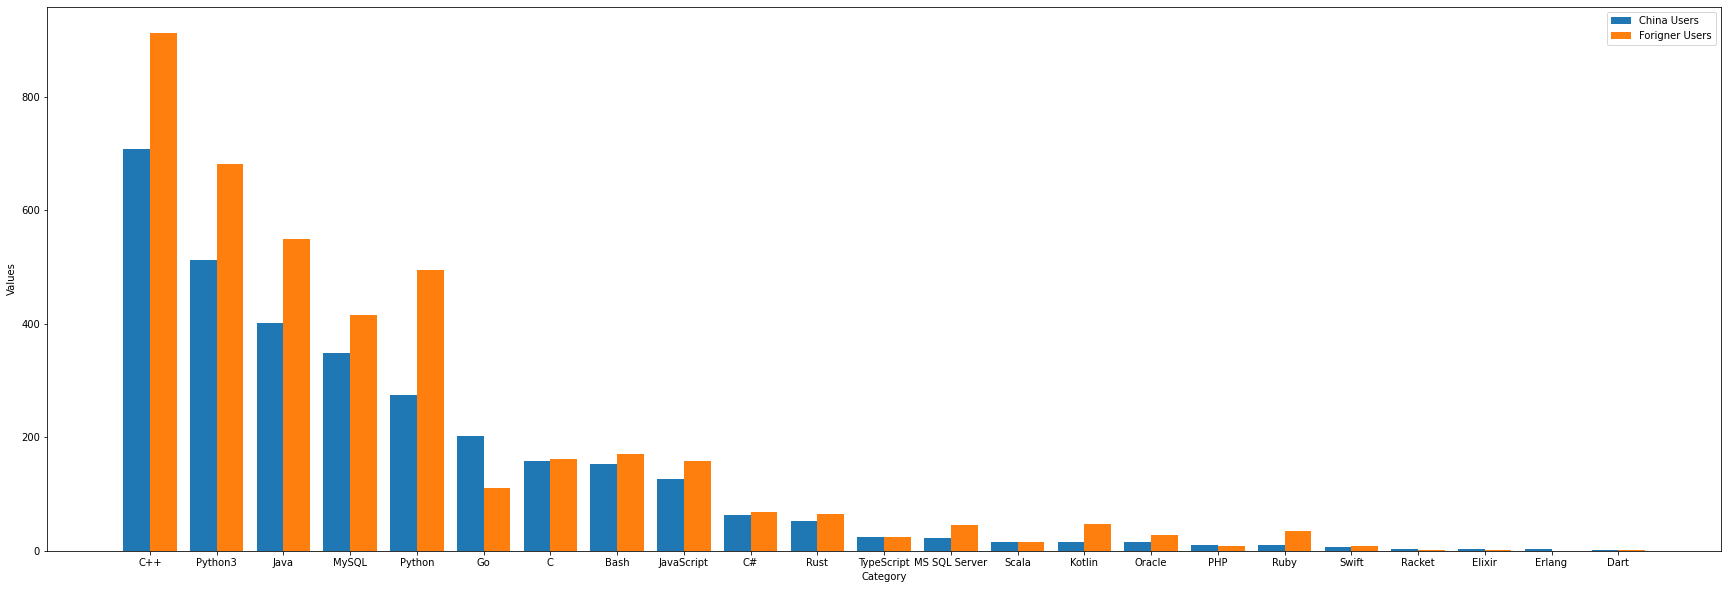

In [483]:
# set bar chat width
bar_width = 0.4

# set bar chat x-asix position
x1 = [i - bar_width / 2 for i in range(len(China_sum_df))]
x2 = [i + bar_width / 2 for i in range(len(Forigner_sum_df))]

# initial
fig, ax = plt.subplots(figsize=(30, 10))

# draw bar chat
ax.bar(x1, China_sum_df['Sum'], width=bar_width, label='China Users')
ax.bar(x2, Forigner_sum_df['Sum'], width=bar_width, label='Forigner Users')

# set x-asix label
ax.set_xticks(range(len(Forigner_sum_df)))
ax.set_xticklabels(Forigner_sum_df['index'])

# set x-asix and y-asix label
ax.set_xlabel('Category')
ax.set_ylabel('Values')
ax.legend()

plt.show()


## Q6:题目所属标签之间的关系

In [484]:
problems_info_df = pd.read_csv(assignmentPath + "problems_info.csv")
problems_info_df.head(3)

Unnamed: 0                              Title  \
0           0  208. Implement Trie (Prefix Tree)   
1           1                         1. Two Sum   
2           2                 2. Add Two Numbers   

                                Topic Label Accetpance Difficulty  Frequency  \
0  ['Hash Table', 'String', 'Design', '1+']     62.50%     Medium  26.1195%;   
1                   ['Array', 'Hash Table']     49.60%       Easy  99.4833%;   
2      ['Linked List', 'Math', 'Recursion']     40.30%     Medium  94.8402%;   

  Accepted Submissions Premium  
0   786.6K        1.3M       Y  
1     9.2M       18.5M     NaN  
2     3.5M        8.7M     NaN

In [485]:
problems_info_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [486]:
problems_info_df['Topic Label'] = problems_info_df['Topic Label'].str.replace('[','').str.replace(']','').str.replace(', ',',')
for index in range(len(problems_info_df)):
    if ',' not in problems_info_df.loc[index, 'Topic Label']:
        problems_info_df.loc[index, problems_info_df.loc[index, 'Topic Label'].replace('\'', '')] = 1
    else:
        for label in problems_info_df.loc[index, 'Topic Label'].split(','):
            problems_info_df.loc[index, label.replace('\'', '')] = 1
problems_info_df.drop('', axis = 1, inplace = True)
problems_Label = problems_info_df.columns.to_list()[8:]

In [487]:
problems_info_df.drop(problems_info_df.columns[ : 8], axis = 1, inplace = True)
problems_info_df.head(3)

Hash Table  String  Design   1+  Array  Linked List  Math  Recursion  \
0         1.0     1.0     1.0  1.0    NaN          NaN   NaN        NaN   
1         1.0     NaN     NaN  NaN    1.0          NaN   NaN        NaN   
2         NaN     NaN     NaN  NaN    NaN          1.0   1.0        1.0   

   Sliding Window  Binary Search  ...  Rejection Sampling  Segment Tree  \
0             NaN            NaN  ...                 NaN           NaN   
1             NaN            NaN  ...                 NaN           NaN   
2             NaN            NaN  ...                 NaN           NaN   

   Shortest Path  Data Stream  Probability and Statistics  Concurrency  \
0            NaN          NaN                         NaN          NaN   
1            NaN          NaN                         NaN          NaN   
2            NaN          NaN                         NaN          NaN   

   Minimum Spanning Tree  7+  Hash Function  Suffix Array  
0                    NaN NaN            NaN           NaN  
1                    NaN NaN            NaN           NaN  
2                    NaN NaN            NaN           NaN  

[3 rows x 70 columns]

In [488]:
label_matrix = pd.DataFrame(columns = problems_Label, index = problems_Label)
label_matrix.fillna(0, inplace = True)
label_matrix.head(3)

Hash Table  String  Design  1+  Array  Linked List  Math  \
Hash Table           0       0       0   0      0            0     0   
String               0       0       0   0      0            0     0   
Design               0       0       0   0      0            0     0   

            Recursion  Sliding Window  Binary Search  ...  Rejection Sampling  \
Hash Table          0               0              0  ...                   0   
String              0               0              0  ...                   0   
Design              0               0              0  ...                   0   

            Segment Tree  Shortest Path  Data Stream  \
Hash Table             0              0            0   
String                 0              0            0   
Design                 0              0            0   

            Probability and Statistics  Concurrency  Minimum Spanning Tree  \
Hash Table                           0            0                      0   
String                               0            0                      0   
Design                               0            0                      0   

            7+  Hash Function  Suffix Array  
Hash Table   0              0             0  
String       0              0             0  
Design       0              0             0  

[3 rows x 70 columns]

In [489]:
for label in problems_Label:
    temp_df = problems_info_df[problems_info_df[label] == 1]
    temp_df.reset_index(inplace = True)
    for index in range(len(temp_df)):
        for column_index in problems_Label:
            if temp_df.loc[index, column_index] == 1 and column_index != label:
                label_matrix.loc[label, column_index] += 1

In [490]:
label_matrix.head(5)

Hash Table  String  Design   1+  Array  Linked List  Math  \
Hash Table           0     182      38  134    279           14    44   
String             182       0      16  114    150            1    63   
Design              38      16       0   39     30           10     2   
1+                 134     114      39    0    252           15    69   
Array              279     150      30  252      0           11   168   

            Recursion  Sliding Window  Binary Search  ...  Rejection Sampling  \
Hash Table          0              23             19  ...                   0   
String             10              22             11  ...                   0   
Design              0               0              8  ...                   0   
1+                  3              13             47  ...                   2   
Array               4              38            166  ...                   0   

            Segment Tree  Shortest Path  Data Stream  \
Hash Table             0              0            0   
String                 1              0            0   
Design                 6              0            1   
1+                     5              0            0   
Array                  5              0            0   

            Probability and Statistics  Concurrency  Minimum Spanning Tree  \
Hash Table                           0            0                      0   
String                               0            0                      0   
Design                               0            0                      0   
1+                                   0            0                      0   
Array                                1            0                      0   

            7+  Hash Function  Suffix Array  
Hash Table   0              0             0  
String       0              1             1  
Design       0              0             0  
1+           0              0             0  
Array        1              0             0  

[5 rows x 70 columns]

In [491]:
label_matrix_raw = label_matrix.iloc[:30, :30]

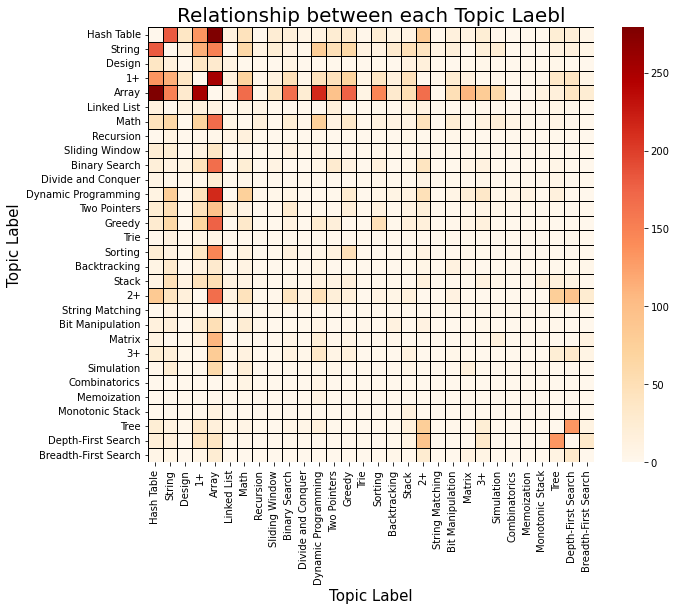

In [492]:
# draw hot-map
plt.figure(figsize=(10, 8))
sns.heatmap(label_matrix_raw, annot = False, cmap = 'OrRd', linewidths = 1, linecolor = 'black')

# set label
plt.title('Relationship between each Topic Laebl', fontsize = 20)
plt.xlabel('Topic Label', fontsize = 15)
plt.ylabel('Topic Label', fontsize = 15)

plt.show()